# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [43]:
# PART 1
import pandas as pd
import numpy as np
import seaborn as sns

airbnb = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)
airbnb['Price'] = airbnb['Price'].str.replace(',', '')
airbnb['Price'] = airbnb['Price'].astype(int)
airbnb

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


The price column was originally full of strings. This could therefore lead values over 999 having commas. This was altered to make the column full of integers, making them easier to manipulate for later usage. None of values were missing or empty at any point, leading to a hassle-free conversion.

Proportion of NaN values in subject_injury: 76.19%


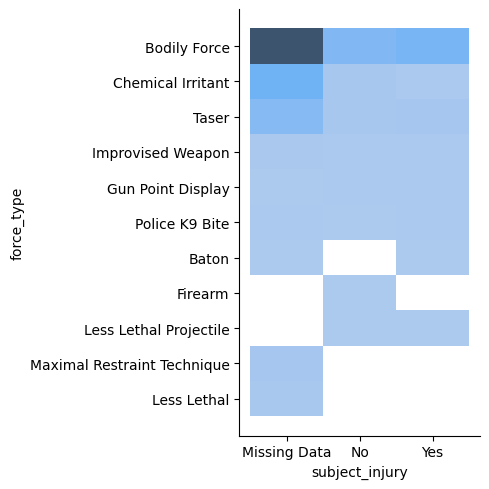

In [44]:
# PART 2
police = pd.read_csv('./data/mn_police_use_of_force.csv',low_memory=False)
subject_col = 'subject_injury'
force_col = 'force_type'
nan_proportion = police[subject_col].isna().mean()
print(f"Proportion of NaN values in {subject_col}: {nan_proportion:.2%}")
police[subject_col] = police[subject_col].fillna('Missing Data')
force_injury = police[[subject_col, force_col]]
sns.displot(force_injury, x=subject_col, y=force_col);

The overwhelming majority of rows are lacking a value in `'subject_injury'`. Of the missing values, an overwhelming amount have the `'force_type'` be 'Bodily Force'. These two findings in tandem allude to an alarming precedent. All empty/NA values were converted to a new categorical variable: `'Missing Data'`.

In [45]:
# PART 3
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial = pd.read_csv(url,low_memory=False)
pretrial

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22981,SJA00343,22839,M,B,1976,41,4,41,2,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22982,SJA00344,,F,W,,,9,,99,99,...,,,,999,999,,3,,9,Defendant could not be classified or tracked d...
22983,SJA00345,22841,M,B,1981,36,4,36,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22984,SJA00346,22842,F,B,1993,24,2,24,5,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [46]:
col = 'WhetherDefendantWasReleasedPretrial'
pretrial[col].unique()

array([9, 0, 1])

In [47]:
pretrial[col] = pretrial[col].replace(9, 'Missing Data').replace(1, 'Yes').replace(0, 'No')
pretrial[col].unique()

array(['Missing Data', 'No', 'Yes'], dtype=object)

Values were replaced with the following interpretation...
- 1 meant 'Yes, they were released' -> replaced with `'Yes'`
- 0 meant 'No, they weren't released' -> replaced with `'No'`
- 9 meant 'No data' -> replaced with `'Missing Data'`

In [48]:
# PART 4 
imposed_col = 'ImposedSentenceAllChargeInContactEvent'
type_col = 'SentenceTypeAllChargesAtConvictionInContactEvent'
pretrial[pretrial[type_col] == 0][imposed_col].unique()

array(['60', '12', '6', '5.91375770020534', '72', '24', '36', '0',
       '2.95687885010267', '108', '300', '240', '120', '54',
       '.328542094455852', '.985626283367556', '48', '.164271047227926',
       '35', '30', '53', '11.9055441478439', '114', '35.0061601642711',
       '2', '102', '57', '84', '118', '29', '59.9260780287474', '66',
       '3.98562628336756', '12.1642710472279', '62', '117', '4.8', '56',
       '86', '23', '168', '42', '27', '1.97125256673511',
       '57.0349075975359', '17', '228', '45', '158', '227', '445', '3',
       '230', '9', '36.9856262833676', '52.5133470225873', '26',
       '33.4928131416838', '96', '344', '59', '91', '28',
       '8.95687885010267', '18.1642710472279', '71', '11.9917864476386',
       '129', '156', '51', '18', '363.663244353183', '107', '480', '276',
       '222', '20', '65', '450', '242', '1.31416837782341', '34',
       '.788501026694045', '399', '50', '33', '4', '5.95277207392197',
       '.0985626283367557', '12.9856262833676',

In [49]:
pretrial[imposed_col] = pretrial[imposed_col].replace(' ', np.nan).astype(float)
pretrial[imposed_col]

0              NaN
1        60.000000
2        12.000000
3         0.985626
4              NaN
           ...    
22981          NaN
22982          NaN
22983          NaN
22984          NaN
22985          NaN
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: float64

Again, all values are strings for this column, but it's better if they're all floats given a large amoutn of these values are meant to be in that form. Of the `SentenceTypeAllChargesAtConvictionInContactEvent` column, there are 5 values...
- 9: No data in `ImposedSentenceAllChargeInContactEvent`. Changed from `' '` to `np.nan`
- 0: Has data in `ImposedSentenceAllChargeInContactEvent`. Converted to float.
- 1: Has data in `ImposedSentenceAllChargeInContactEvent`. Converted to float.
- 4: No data in `ImposedSentenceAllChargeInContactEvent`. Changed from `' '` to `np.nan`
- 2: Has data in `ImposedSentenceAllChargeInContactEvent`. Converted to float.

NaN values was used instead of a 'Missing Data' string in order to maintain float integrity.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./data/shark_attacks.xls')
df = df.iloc[:, :15] # deleting columns with no data
col = 'Year'
df[col] = pd.to_numeric(df[col], errors='coerce') # cleaning year
df = df[df[col].notna()]
df[col] = df[col].astype(int)
df = df[df[col] != 0]
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-11 00:00:00,2025,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
1,2025-01-02 00:00:00,2025,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
2,2025-01-02 00:00:00,2025,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...
3,2024-12-29 00:00:00,2024,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,Injuries to stomach preventing attack on friend,N,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...
4,2024-12-29 00:00:00,2024,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,Entire calf muscle removed and bitten both arm...,Y,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6856,Ca 1588.04.00,1518,Unprovoked,MEXICO,Yucatan,Cozumel,Swmming,A cacique (a chief),M,NaN,Toes severed,N,NaN,NaN,"C. Moore, GSAF"
6857,Ca 1200-1500 A.D.,1500,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,Foot severed,N,NaN,NaN,J. Castro
6858,Ca.789-1033 A.D,1000,Unprovoked,USA,Puerto Rico,Archeological site,NaN,male,M,29,FATAL,N,NaN,Tiger shark,P. Seigel
6859,Ca. 77 A.D.,77,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,NaN,FATAL,Y,NaN,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...


Given the head and tails of data above, the range of years spans from 5 to 2025.

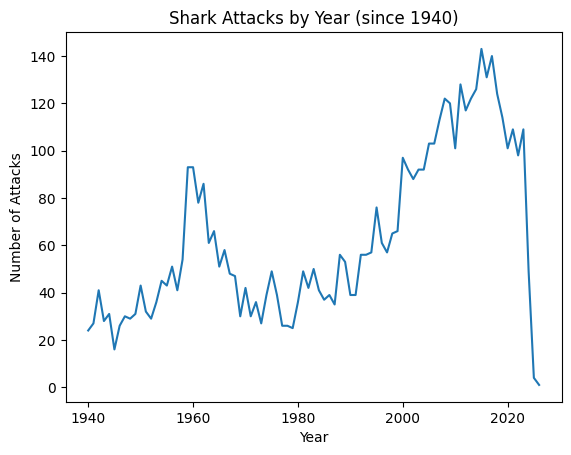

In [51]:
yearly_attacks = df[df[col] >= 1940].groupby(col).size()
plt.plot(yearly_attacks.index, yearly_attacks.values)
plt.title('Shark Attacks by Year (since 1940)')
plt.xlabel(col)
plt.ylabel('Number of Attacks')
plt.show()

Using the data from the plot above, we can see that there has been an overall increase of shark attacks since 1940. There was a peak in the early 1960s that dropped down not long after. However, since 1990 there has been a steady increase.

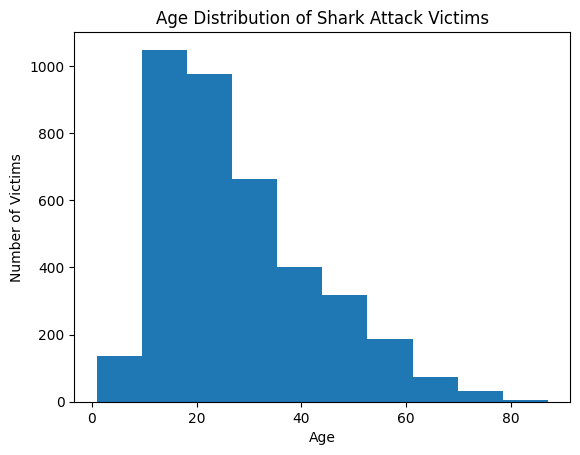

In [52]:
col = 'Age'
df = df[df[col].apply(lambda x: str(x).isdigit())]
df.loc[:, col] = df[col].astype(int)
plt.hist(df[col])
plt.title('Age Distribution of Shark Attack Victims')
plt.xlabel(col)
plt.ylabel('Number of Victims')
plt.show()

In [53]:
proportion = (df['Sex'].str.upper().str.strip() == 'M').mean()
print(f"Proportion of male victims: {proportion:.2%}")

Proportion of male victims: 84.50%


In [54]:
df.loc[:, 'Type'] = df['Type'].str.lower().str.strip()
df.loc[:, 'Type'] = df['Type'].apply(lambda x: 'Unprovoked' if 'unprovoked' in str(x) 
                                    else 'Provoked' if 'provoked' in str(x) 
                                    else 'Unknown')

unprovoked_proportion = (df['Type'] == 'Unprovoked').mean()
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2%}")

Proportion of unprovoked attacks: 83.28%


In [55]:
fatal_col = 'Fatal Y/N'
df.loc[:, fatal_col] = df[fatal_col].str.lower().str.strip()
df.loc[:, fatal_col] = df[fatal_col].apply(lambda x: 'Unknown' if 'unknown' in str(x) 
                                    else 'Y' if 'y' in str(x)
                                    else 'N' if 'n' in str(x)
                                    else 'Unknown')
df[fatal_col].unique()

array(['N', 'Y', 'Unknown'], dtype=object)

In [56]:
provoked = df[df['Type'] == 'Provoked']
unprovoked = df[df['Type'] == 'Unprovoked']
m_attacks = df[df['Sex'] == 'M']
f_attacks = df[df['Sex'] == 'F']

male_proportion = (unprovoked['Sex'] == 'M').mean()
print(f"Proportion of unprovoked attacks on men: {male_proportion:.2%}")

female_proportion = (unprovoked['Sex'] == 'F').mean()
print(f"Proportion of unprovoked attacks on women: {female_proportion:.2%}")

fatalp_proportion = (provoked[fatal_col] == 'Y').mean()
print(f"Proportion of provoked attacks that are fatal: {fatalp_proportion:.2%}")

fatalu_proportion = (unprovoked[fatal_col] == 'Y').mean()
print(f"Proportion of unprovoked attacks that are fatal: {fatalu_proportion:.2%}")

fatalm_proportion = (m_attacks[fatal_col] == 'Y').mean()
print(f"Proportion of attacks on men that are fatal: {fatalm_proportion:.2%}")

fatalf_proportion = (f_attacks[fatal_col] == 'Y').mean()
print(f"Proportion of attacks on women that are fatal: {fatalf_proportion:.2%}")

Proportion of unprovoked attacks on men: 83.95%
Proportion of unprovoked attacks on women: 15.26%
Proportion of provoked attacks that are fatal: 2.63%
Proportion of unprovoked attacks that are fatal: 19.46%
Proportion of attacks on men that are fatal: 17.64%
Proportion of attacks on women that are fatal: 14.08%


Based on the proportions above...
- Men are more likely to be victims of unprovoked attacks.
- Unprovoked attacks are more likely to be fatal.
- Men are more likely to succumb to fatal attacks.
- I feel slightly more scared of sharks today than I did last week.

In [57]:
white_proportion = df.iloc[:, 13].str.lower().str.contains('white', na=False).mean()
print(f"Proportion of attacks from white sharks: {white_proportion:.2%}")

Proportion of attacks from white sharks: 12.74%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?